## Import Libraries

In [14]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy 
from scipy import ndimage
import seaborn as sns
import time
import math 

%matplotlib inline

## Import Data

In [2]:
def load_dataset():
    
    training_data = h5py.File('C:/Users/Akhil/Deep Learning Everyday/Logistic Regression with Neural Network Mindset/dataset/train_catvnoncat.h5',"r")
    x_train_orig = np.array(training_data["train_set_x"][:])
    y_train_orig = np.array(training_data["train_set_y"][:])
    
    classes = np.array(training_data["list_classes"][:])
    
    test_data = h5py.File('C:/Users/Akhil/Deep Learning Everyday/Logistic Regression with Neural Network Mindset/dataset/test_catvnoncat.h5',"r")
    x_test_orig = np.array(test_data["test_set_x"][:])
    y_test_orig = np.array(test_data["test_set_y"][:])
    
    y_train_orig = y_train_orig.reshape(1,y_train_orig.shape[0])
    y_test_orig = y_test_orig.reshape(1, y_test_orig.shape[0])
    
    return x_train_orig, y_train_orig, x_test_orig, y_test_orig, classes

## Load Data

In [3]:
x_train_orig, y_train_orig, x_test_orig, y_test_orig, classes = load_dataset()

## Visualize the Data

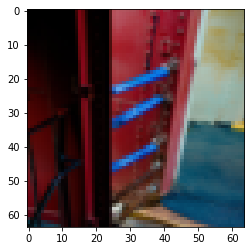

y = [0] This means it is a non-cat image


In [4]:
index = 45
plt.imshow(x_train_orig[index])
plt.show()
print("y = " + str(y_train_orig[:, index])+ " This means it is a " + classes[np.squeeze(y_train_orig[:,index])].decode("utf-8")+ " image" )

## Shape of the Data

In [5]:
train_ex = y_train_orig.shape[1]
test_ex = y_test_orig.shape[1]

print("The number of training examples are " + str(train_ex))
print("the number of testing examples are " + str(test_ex))

print("the size of the training input is " + str(x_train_orig.shape))
print("The size of the training ouput is " + str(y_train_orig.shape))
print("The size of the test input is " + str(x_test_orig.shape))
print("the size of the test output is " + str(y_test_orig.shape))

The number of training examples are 209
the number of testing examples are 50
the size of the training input is (209, 64, 64, 3)
The size of the training ouput is (1, 209)
The size of the test input is (50, 64, 64, 3)
the size of the test output is (1, 50)


## Reshaping and Normalization

In [7]:
x_train_flat = x_train_orig.reshape(x_train_orig.shape[0],-1).T
x_test_flat = x_test_orig.reshape(x_test_orig.shape[0],-1).T

x_train = x_train_flat/255
x_test = x_test_flat/255

y_train  = y_train_orig
y_test = y_test_orig

print("the size of the training input is " + str(x_train.shape))
print("The size of the training ouput is " + str(y_train.shape))
print("The size of the test input is " + str(x_test.shape))
print("the size of the test output is " + str(y_test.shape))

the size of the training input is (12288, 209)
The size of the training ouput is (1, 209)
The size of the test input is (12288, 50)
the size of the test output is (1, 50)


# One Layer Neural Network

## Sigmoid Fucntion

In [9]:
def sigmoid(x):
    
    z = 1 / (1 + np.exp(-x))
    
    return z
    

## Initialize Parameters

In [10]:
def initialize_with_zeros(dim):
    
    w = np.zeros(shape = (dim ,1 ))
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

## Forward and Backpropagation


In [11]:
def propagate(w,b,x,y):
    
    m = x.shape[1]
    z = None
    a = None
    cost = None
    
    # forward prop
    z = np.dot(w.T, x) + b
    a = sigmoid(z)
    cost = (-1/m)*np.sum(y * np.log(a) + (1- y)* np.log(1-a))
    
    #backprop
    dw = (1 / m) * np.dot(x, (a - y).T)
    db = (1 / m) * np.sum(a - y)
    
    cost = np.squeeze(cost)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    assert(cost.shape == ())
           
    grad = {"dw": dw, "db": db}
    
    return cost, grad

## Optimize

In [12]:
def optimize(w, b, x, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        cost, grad = propagate(w,b,x,y)
        
        dw = grad["dw"]
        db = grad["db"]
        w = w - dw*learning_rate
        b = b- db* learning_rate
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print("The cost after " +str(i) + " interation is " + str(cost))
          
    params = {"w": w, "b": b}
    grads = {"dw" : dw, "db": db}
    
    return params, grads, costs

## Predict

In [13]:
def predict(w,b,x,y):
    
    m = x.shape[1]
    y_predict = np.zeros(shape = (1, y.shape[1]))
    w = w.reshape(x.shape[0], 1)
    
    z2 = None
    a2 =None
    
    
    z2 = np.dot(w.T, x) + b
    a2 = sigmoid(z2)
    
    for i in range(m):
        
        if a2[0,i] > 0.5 :
            y_predict[0,i] = 1
        else:
            y_predict[0,i] = 0
    
    assert(y_predict.shape ==(1, m))
    
    return y_predict
            

## Model

In [20]:
def model(x_train, y_train, x_test, y_test, num_iterations, learning_rate, print_cost = False):
    
    start = time.time()
    w , b = initialize_with_zeros(x_train.shape[0])
    
    params, grads, costs = optimize(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)
    
    w = params["w"]
    b = params["b"]
    
    y_predict_train = predict(w,b,x_train,y_train)
    y_predict_test = predict(w,b,x_test,y_test)
    
    print()
    print("the accuracy of the training model is " + str(100 - 100*np.mean(np.abs(y_predict_train))) + "%" )
    print("the accuracy of the test model is " + str(100 - 100*np.mean(np.abs(y_predict_test))) + "%" )
    
    My_model = {"costs": costs, "w": w, "b":b, "learning_rate":learning_rate, "num_iterations": num_iterations,
                "y_predict_train": y_predict_train, "y_predict_test": y_predict_test}
    
    end = time.time()
    print("the Time required was " + str(end-start))
    return My_model

In [21]:
My_model = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

The cost after 0 interation is 0.6931471805599453
The cost after 100 interation is 0.5845083636993086
The cost after 200 interation is 0.46694904094655476
The cost after 300 interation is 0.37600686694802077
The cost after 400 interation is 0.3314632893282513
The cost after 500 interation is 0.30327306747438293
The cost after 600 interation is 0.2798795865826048
The cost after 700 interation is 0.26004213692587574
The cost after 800 interation is 0.24294068467796623
The cost after 900 interation is 0.22800422256726066
The cost after 1000 interation is 0.21481951378449635
The cost after 1100 interation is 0.20307819060644985
The cost after 1200 interation is 0.1925442771670686
The cost after 1300 interation is 0.18303333796883503
The cost after 1400 interation is 0.17439859438448876
The cost after 1500 interation is 0.16652139705400335
The cost after 1600 interation is 0.15930451829756614
The cost after 1700 interation is 0.15266732471296504
The cost after 1800 interation is 0.146542235

## Plot

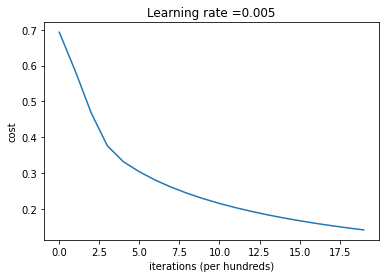

In [22]:
costs = np.squeeze(My_model["costs"])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(My_model["learning_rate"]))
plt.show()

## Comparing different Learning Rates

learning rate is: 0.01

the accuracy of the training model is 65.07177033492823%
the accuracy of the test model is 42.00000000000001%
the Time required was 4.771312952041626

-------------------------------------------------------

learning rate is: 0.001

the accuracy of the training model is 70.8133971291866%
the accuracy of the test model is 54.0%
the Time required was 4.12396764755249

-------------------------------------------------------

learning rate is: 0.0001

the accuracy of the training model is 94.25837320574163%
the accuracy of the test model is 94.0%
the Time required was 3.732985258102417

-------------------------------------------------------

learning rate is: 1e-05

the accuracy of the training model is 100.0%
the accuracy of the test model is 100.0%
the Time required was 3.694037675857544

-------------------------------------------------------



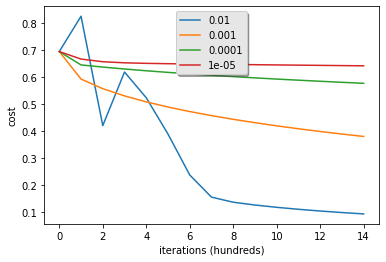

In [23]:
learning_rates = [0.01, 0.001, 0.0001, 0.00001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(x_train, y_train, x_test, y_test, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()